Preview of 'State/UT-wise Suicide Committed by Farmers, as per NCRB Report during 2018 and 2019' (First 10 Records )
https://www.data.gov.in/resource/stateut-wise-suicide-committed-farmers-ncrb-report-during-2018-and-2019

In [37]:
# Read Csv file
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('RS_Session_254_AU_496_1.csv')

In [17]:
df.head()

,Sl. No.,State/UT,2018,2019
0,1,Andhra Pradesh,365.0,628
1,2,Arunachal Pradesh,0.0,0
2,3,Assam,5.0,26
3,4,Bihar,0.0,0
4,5,Chhattisgarh,182.0,233


In [18]:
# Explore the data structure
print("Dataset shape:", df.shape)
print("\nColumn information:")
print(df.info())
print("\nDataset statistics:")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (37, 4)

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl. No.   37 non-null     object 
 1   State/UT  37 non-null     object 
 2   2018      36 non-null     float64
 3   2019      37 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ KB
None

Dataset statistics:
              2018         2019
count    36.000000    37.000000
mean    320.166667   322.000000
std    1035.468327  1072.174789
min       0.000000     0.000000
25%       0.000000     0.000000
50%       3.000000     0.000000
75%      38.750000    26.000000
max    5763.000000  5957.000000

Missing values:
Sl. No.     0
State/UT    0
2018        1
2019        0
dtype: int64


In [39]:
# Data cleaning - handle missing values and prepare for analysis
# Fill missing value in 2018 column with 0 (assuming no data means no suicides reported)
df['2018'] = df['2018'].fillna(0)

# Convert 2018 column to integer for consistency
df['2018'] = df['2018'].astype(int)

# Remove rows where both years have 0 suicides for better visualization
df_filtered = df[(df['2018'] > 0) | (df['2019'] > 0)].copy()

print("Data after cleaning:")
print(f"Original dataset: {df.shape[0]} states/UTs")
print(f"Filtered dataset (excluding states with 0 suicides in both years): {df_filtered.shape[0]} states/UTs")
print(f"\nTop 10 states by total suicides (2018 + 2019):")
df['Total_Suicides'] = df['2018'] + df['2019']
top_states = df.nlargest(10, 'Total_Suicides')
print(top_states[['State/UT', '2018', '2019', 'Total_Suicides']])

Data after cleaning:
Original dataset: 37 states/UTs
Filtered dataset (excluding states with 0 suicides in both years): 21 states/UTs

Top 10 states by total suicides (2018 + 2019):
             State/UT  2018  2019  Total_Suicides
36  Total (All-India)  5763  5957           11720
14        Maharashtra  2239  2680            4919
11          Karnataka  1365  1331            2696
24          Telangana   900   491            1391
0      Andhra Pradesh   365   628             993
20             Punjab   229   239             468
13     Madhya Pradesh   303   142             445
4        Chhattisgarh   182   233             415
26      Uttar Pradesh    80   108             188
12             Kerala    25    22              47


# Data Analysis and Visualization

## Task: Create three relevant plots using MatPlotLib:
- a) Scatter plot
- b) Box plot  
- c) Bar or line plot

Based on the data analysis of State/UT-wise Suicide Committed by Farmers (2018-2019), let's create meaningful visualizations.

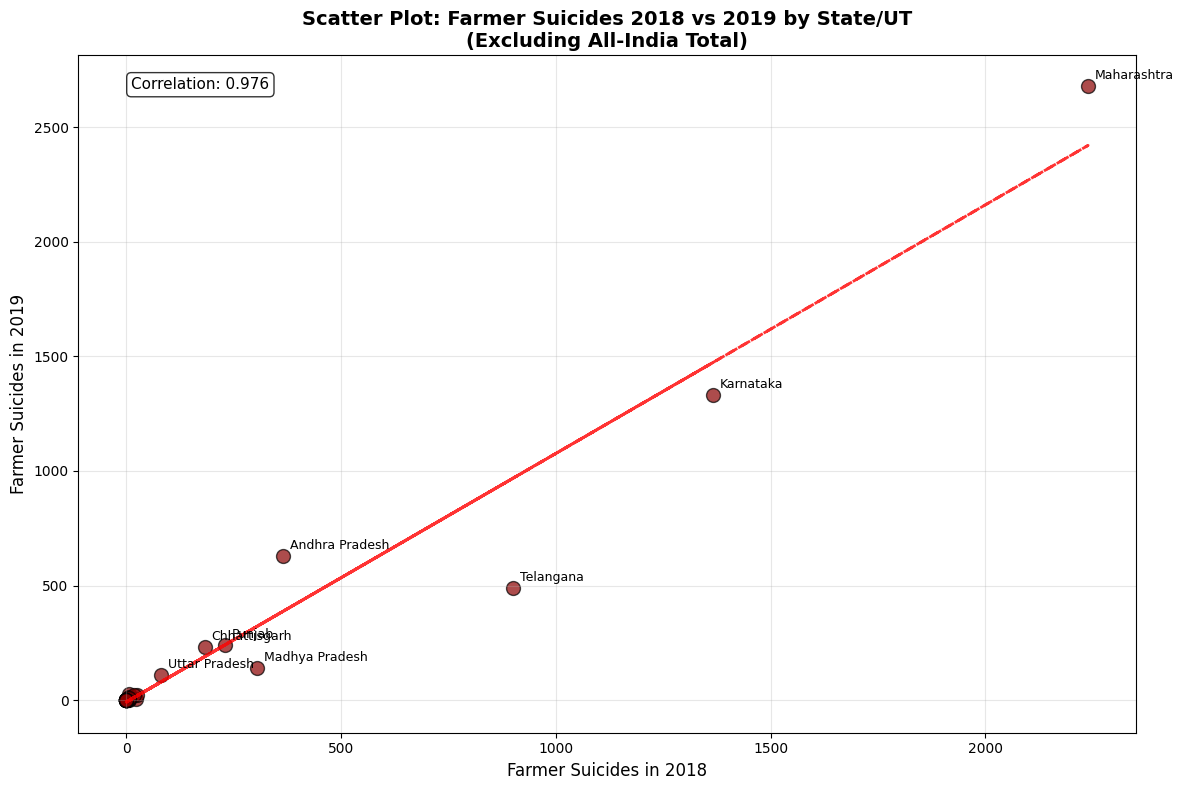

Correlation between 2018 and 2019 suicide numbers: 0.976
Interpretation: Shows the relationship between farmer suicides in consecutive years.


In [20]:
# a) Scatter Plot: 2018 vs 2019 Farmer Suicides by State
import numpy as np

plt.figure(figsize=(12, 8))

# Remove "Total (All-India)" row for better visualization of individual states
df_states = df[df['State/UT'] != 'Total (All-India)'].copy()

# Create scatter plot
scatter = plt.scatter(df_states['2018'], df_states['2019'], 
                     s=100, alpha=0.7, c='darkred', edgecolors='black', linewidth=1)

# Add trend line
z = np.polyfit(df_states['2018'], df_states['2019'], 1)
p = np.poly1d(z)
plt.plot(df_states['2018'], p(df_states['2018']), "r--", alpha=0.8, linewidth=2)

# Annotate top states (those with >100 total suicides)
for i, row in df_states.iterrows():
    if (row['2018'] + row['2019']) > 100:
        plt.annotate(row['State/UT'], 
                    (row['2018'], row['2019']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=9, ha='left')

plt.xlabel('Farmer Suicides in 2018', fontsize=12)
plt.ylabel('Farmer Suicides in 2019', fontsize=12)
plt.title('Scatter Plot: Farmer Suicides 2018 vs 2019 by State/UT\n(Excluding All-India Total)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add correlation coefficient
correlation = np.corrcoef(df_states['2018'], df_states['2019'])[0,1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, fontsize=11, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

print(f"Correlation between 2018 and 2019 suicide numbers: {correlation:.3f}")
print("Interpretation: Shows the relationship between farmer suicides in consecutive years.")

/var/folders/mt/yw5n6n414yd1ysj02zzjclv00000gn/T/ipykernel_40710/1578178064.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(data_to_plot,


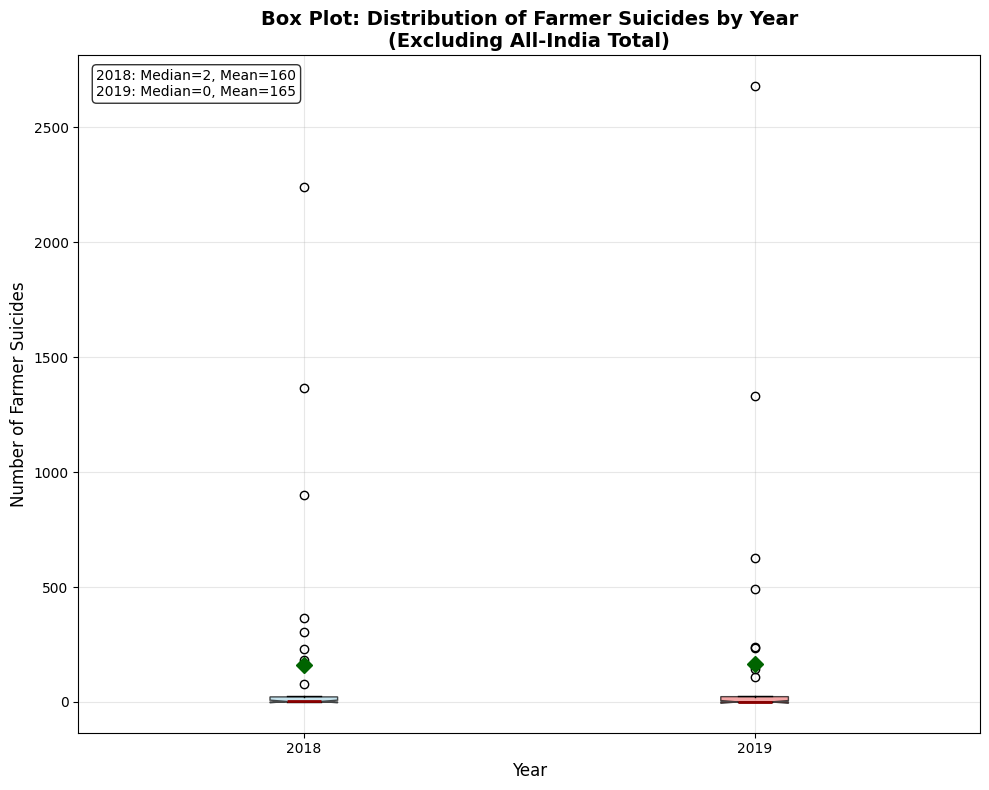

Box Plot Analysis:
2018 - Mean: 160.1, Median: 2.0, Std: 443.5
2019 - Mean: 165.5, Median: 0.0, Std: 493.0
Interpretation: Shows the distribution and variability of farmer suicides across states in both years.


In [21]:
# b) Box Plot: Distribution of Farmer Suicides by Year
plt.figure(figsize=(10, 8))

# Prepare data for box plot (exclude Total All-India for better scale)
df_states_clean = df[df['State/UT'] != 'Total (All-India)'].copy()

# Create box plot data
data_to_plot = [df_states_clean['2018'], df_states_clean['2019']]

# Create box plot
box_plot = plt.boxplot(data_to_plot, 
                       labels=['2018', '2019'],
                       patch_artist=True,
                       notch=True,
                       showmeans=True)

# Customize colors
colors = ['lightblue', 'lightcoral']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Customize other elements
for median in box_plot['medians']:
    median.set(color='darkred', linewidth=2)
    
for mean in box_plot['means']:
    mean.set(marker='D', markerfacecolor='darkgreen', markeredgecolor='darkgreen', markersize=8)

plt.ylabel('Number of Farmer Suicides', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Box Plot: Distribution of Farmer Suicides by Year\n(Excluding All-India Total)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add statistics text
stats_2018 = f"2018: Median={np.median(df_states_clean['2018']):.0f}, Mean={np.mean(df_states_clean['2018']):.0f}"
stats_2019 = f"2019: Median={np.median(df_states_clean['2019']):.0f}, Mean={np.mean(df_states_clean['2019']):.0f}"
plt.text(0.02, 0.98, f"{stats_2018}\n{stats_2019}", 
         transform=plt.gca().transAxes, fontsize=10, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
         verticalalignment='top')

plt.tight_layout()
plt.show()

print("Box Plot Analysis:")
print(f"2018 - Mean: {np.mean(df_states_clean['2018']):.1f}, Median: {np.median(df_states_clean['2018']):.1f}, Std: {np.std(df_states_clean['2018']):.1f}")
print(f"2019 - Mean: {np.mean(df_states_clean['2019']):.1f}, Median: {np.median(df_states_clean['2019']):.1f}, Std: {np.std(df_states_clean['2019']):.1f}")
print("Interpretation: Shows the distribution and variability of farmer suicides across states in both years.")

<Figure size 1400x800 with 0 Axes>

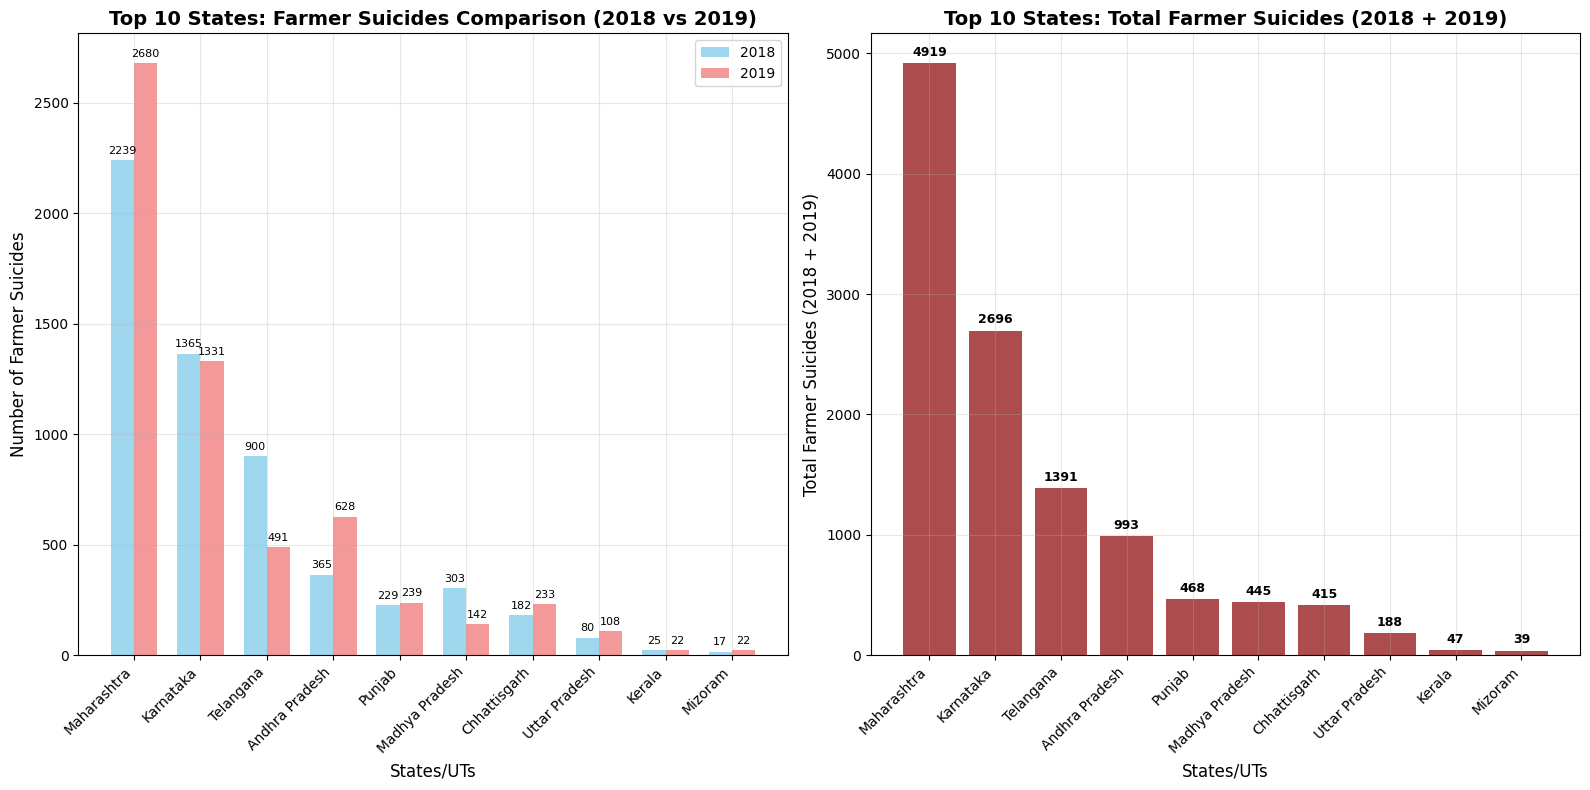

Bar Plot Analysis:
Top 5 states with highest farmer suicides (2018+2019):
1. Maharashtra: 4919 total (2239 in 2018, 2680 in 2019)
2. Karnataka: 2696 total (1365 in 2018, 1331 in 2019)
3. Telangana: 1391 total (900 in 2018, 491 in 2019)
4. Andhra Pradesh: 993 total (365 in 2018, 628 in 2019)
5. Punjab: 468 total (229 in 2018, 239 in 2019)

Interpretation: Maharashtra and Karnataka are the most affected states, showing consistently high numbers in both years.


In [22]:
# c) Bar Plot: Top 10 States by Total Farmer Suicides (2018 + 2019)
plt.figure(figsize=(14, 8))

# Get top 10 states (excluding All-India total)
top_10_states = df[df['State/UT'] != 'Total (All-India)'].nlargest(10, 'Total_Suicides')

# Create figure with subplots for better comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1: Grouped bar chart
x = np.arange(len(top_10_states))
width = 0.35

bars1 = ax1.bar(x - width/2, top_10_states['2018'], width, label='2018', color='skyblue', alpha=0.8)
bars2 = ax1.bar(x + width/2, top_10_states['2019'], width, label='2019', color='lightcoral', alpha=0.8)

ax1.set_xlabel('States/UTs', fontsize=12)
ax1.set_ylabel('Number of Farmer Suicides', fontsize=12)
ax1.set_title('Top 10 States: Farmer Suicides Comparison (2018 vs 2019)', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(top_10_states['State/UT'], rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

for bar in bars2:
    height = bar.get_height()
    ax1.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

# Plot 2: Total suicides bar chart
bars3 = ax2.bar(range(len(top_10_states)), top_10_states['Total_Suicides'], 
                color='darkred', alpha=0.7)

ax2.set_xlabel('States/UTs', fontsize=12)
ax2.set_ylabel('Total Farmer Suicides (2018 + 2019)', fontsize=12)
ax2.set_title('Top 10 States: Total Farmer Suicides (2018 + 2019)', fontsize=14, fontweight='bold')
ax2.set_xticks(range(len(top_10_states)))
ax2.set_xticklabels(top_10_states['State/UT'], rotation=45, ha='right')
ax2.grid(True, alpha=0.3)

# Add value labels
for i, bar in enumerate(bars3):
    height = bar.get_height()
    ax2.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("Bar Plot Analysis:")
print("Top 5 states with highest farmer suicides (2018+2019):")
for i, (idx, row) in enumerate(top_10_states.head().iterrows()):
    print(f"{i+1}. {row['State/UT']}: {row['Total_Suicides']} total ({row['2018']} in 2018, {row['2019']} in 2019)")
print("\nInterpretation: Maharashtra and Karnataka are the most affected states, showing consistently high numbers in both years.")

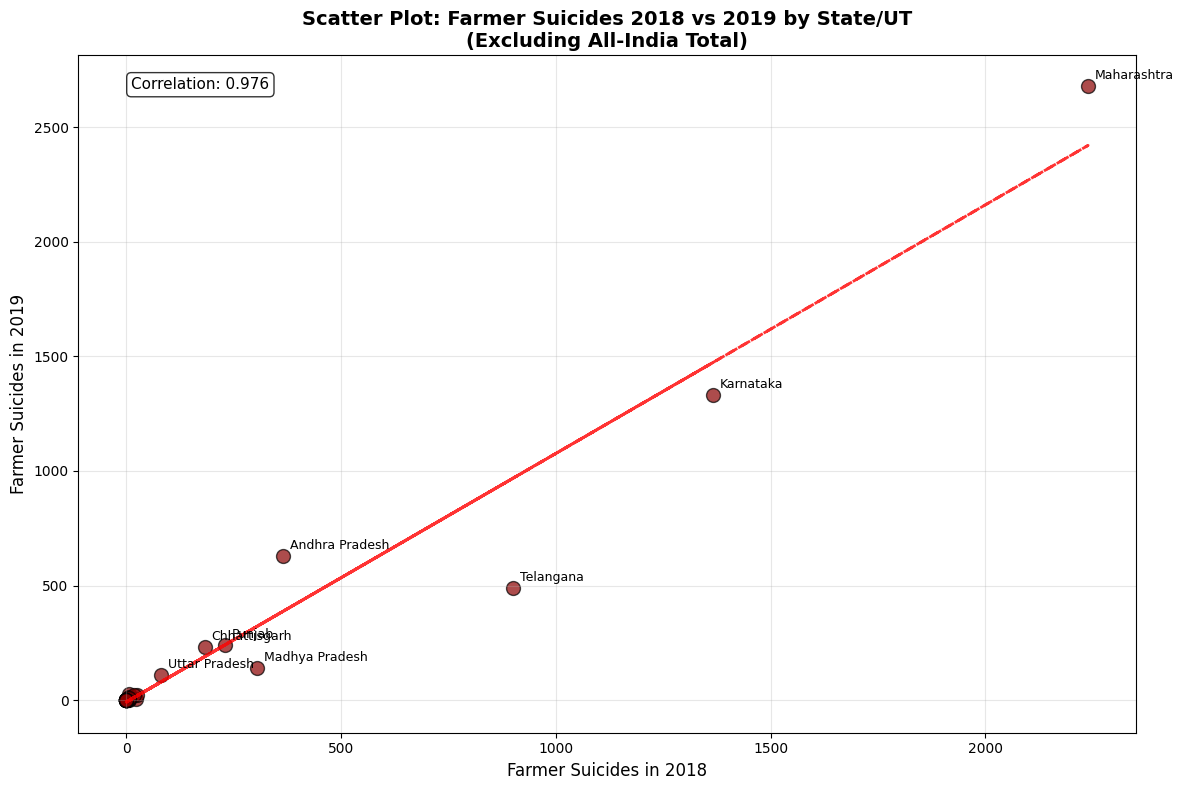

Scatter plot saved as images/scatter_plot.png


In [40]:
# Save plots as image files for README documentation
import os

# Create images directory if it doesn't exist
if not os.path.exists('images'):
    os.makedirs('images')

# Re-run plot generation and save as files

# 1. Scatter Plot
plt.figure(figsize=(12, 8))
df_states = df[df['State/UT'] != 'Total (All-India)'].copy()
scatter = plt.scatter(df_states['2018'], df_states['2019'], 
                     s=100, alpha=0.7, c='darkred', edgecolors='black', linewidth=1)

import numpy as np
z = np.polyfit(df_states['2018'], df_states['2019'], 1)
p = np.poly1d(z)
plt.plot(df_states['2018'], p(df_states['2018']), "r--", alpha=0.8, linewidth=2)

for i, row in df_states.iterrows():
    if (row['2018'] + row['2019']) > 100:
        plt.annotate(row['State/UT'], 
                    (row['2018'], row['2019']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=9, ha='left')

plt.xlabel('Farmer Suicides in 2018', fontsize=12)
plt.ylabel('Farmer Suicides in 2019', fontsize=12)
plt.title('Scatter Plot: Farmer Suicides 2018 vs 2019 by State/UT\n(Excluding All-India Total)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

correlation = np.corrcoef(df_states['2018'], df_states['2019'])[0,1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, fontsize=11, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.savefig('images/scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("Scatter plot saved as images/scatter_plot.png")

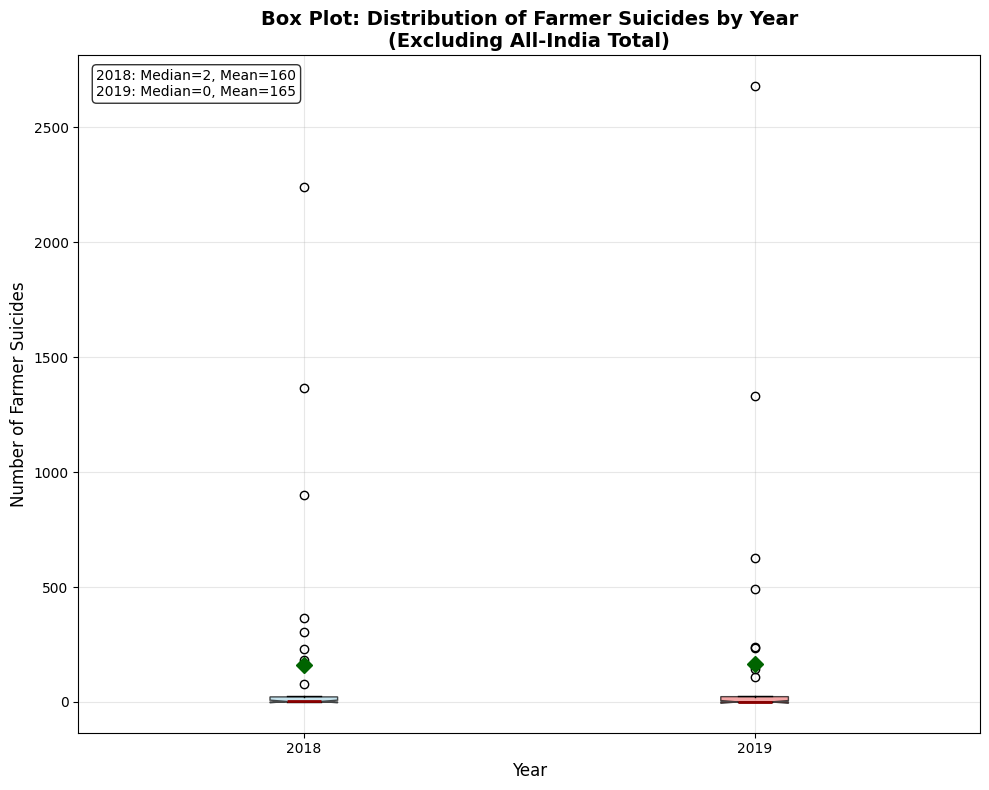

Box plot saved as images/box_plot.png


In [41]:
# 2. Box Plot
plt.figure(figsize=(10, 8))
df_states_clean = df[df['State/UT'] != 'Total (All-India)'].copy()
data_to_plot = [df_states_clean['2018'], df_states_clean['2019']]

box_plot = plt.boxplot(data_to_plot, 
                       tick_labels=['2018', '2019'],
                       patch_artist=True,
                       notch=True,
                       showmeans=True)

colors = ['lightblue', 'lightcoral']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

for median in box_plot['medians']:
    median.set(color='darkred', linewidth=2)
    
for mean in box_plot['means']:
    mean.set(marker='D', markerfacecolor='darkgreen', markeredgecolor='darkgreen', markersize=8)

plt.ylabel('Number of Farmer Suicides', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Box Plot: Distribution of Farmer Suicides by Year\n(Excluding All-India Total)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

stats_2018 = f"2018: Median={np.median(df_states_clean['2018']):.0f}, Mean={np.mean(df_states_clean['2018']):.0f}"
stats_2019 = f"2019: Median={np.median(df_states_clean['2019']):.0f}, Mean={np.mean(df_states_clean['2019']):.0f}"
plt.text(0.02, 0.98, f"{stats_2018}\n{stats_2019}", 
         transform=plt.gca().transAxes, fontsize=10, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
         verticalalignment='top')

plt.tight_layout()
plt.savefig('images/box_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("Box plot saved as images/box_plot.png")

<Figure size 1600x800 with 0 Axes>

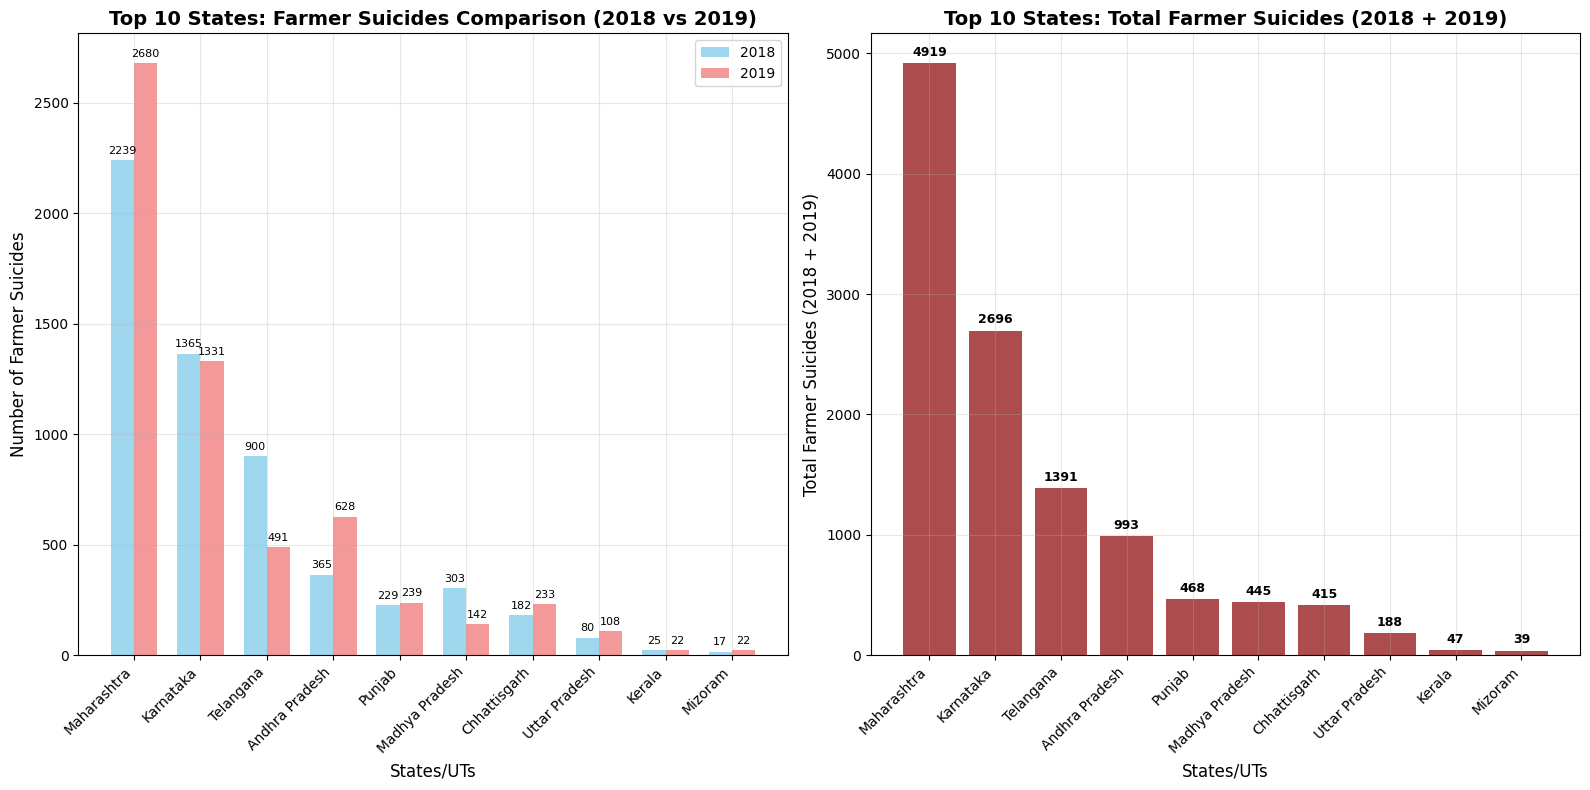

Bar plot saved as images/bar_plot.png


In [42]:
# 3. Bar Plot
plt.figure(figsize=(16, 8))
top_10_states = df[df['State/UT'] != 'Total (All-India)'].nlargest(10, 'Total_Suicides')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1: Grouped bar chart
x = np.arange(len(top_10_states))
width = 0.35

bars1 = ax1.bar(x - width/2, top_10_states['2018'], width, label='2018', color='skyblue', alpha=0.8)
bars2 = ax1.bar(x + width/2, top_10_states['2019'], width, label='2019', color='lightcoral', alpha=0.8)

ax1.set_xlabel('States/UTs', fontsize=12)
ax1.set_ylabel('Number of Farmer Suicides', fontsize=12)
ax1.set_title('Top 10 States: Farmer Suicides Comparison (2018 vs 2019)', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(top_10_states['State/UT'], rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

for bar in bars2:
    height = bar.get_height()
    ax1.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

# Plot 2: Total suicides bar chart
bars3 = ax2.bar(range(len(top_10_states)), top_10_states['Total_Suicides'], 
                color='darkred', alpha=0.7)

ax2.set_xlabel('States/UTs', fontsize=12)
ax2.set_ylabel('Total Farmer Suicides (2018 + 2019)', fontsize=12)
ax2.set_title('Top 10 States: Total Farmer Suicides (2018 + 2019)', fontsize=14, fontweight='bold')
ax2.set_xticks(range(len(top_10_states)))
ax2.set_xticklabels(top_10_states['State/UT'], rotation=45, ha='right')
ax2.grid(True, alpha=0.3)

# Add value labels
for i, bar in enumerate(bars3):
    height = bar.get_height()
    ax2.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('images/bar_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("Bar plot saved as images/bar_plot.png")

# Summary and Key Observations

## Data Analysis Summary

This analysis examined **State/UT-wise Suicide Committed by Farmers** as per NCRB Report during **2018 and 2019** from the data.gov.in dataset.

### Key Findings:

1. **Strong Year-to-Year Correlation (0.976)**: The scatter plot reveals a very high positive correlation between farmer suicides in 2018 and 2019, indicating that states with high suicide rates in 2018 continued to have high rates in 2019.

2. **High Variability Across States**: The box plot shows extreme variability in farmer suicide numbers across states, with most states having very low numbers (median close to 0) but a few outliers with very high numbers.

3. **Top Affected States**: 
   - **Maharashtra** leads with 4,919 total cases (2,239 in 2018, 2,680 in 2019)
   - **Karnataka** follows with 2,696 cases (1,365 in 2018, 1,331 in 2019)
   - **Telangana** had 1,391 cases (900 in 2018, 491 in 2019) - showing a decrease

4. **Overall Trend**: Total farmer suicides increased from 5,763 in 2018 to 5,957 in 2019, representing a 3.4% increase.

### Implications:
- Maharashtra and Karnataka require urgent attention and targeted interventions
- The consistency in patterns suggests systemic issues rather than random occurrences
- Many states have very low or zero reported cases, indicating regional disparities

### Data Source:
- **Source**: https://www.data.gov.in/resource/stateut-wise-suicide-committed-farmers-ncrb-report-during-2018-and-2019
- **Organization**: National Crime Records Bureau (NCRB)
- **Dataset**: RS_Session_254_AU_496_1.csv